# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
import scipy as sp
%matplotlib inline
pd.options.mode.chained_assignment = None

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pima = pd.read_csv('diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
pima.shape

(768, 9)

In [6]:
pima_desc = pima.describe().transpose().reset_index()
pima_desc

,index,count,mean,std,min,25%,50%,75%,max
0,Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
1,Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
2,BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
3,SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
4,Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
5,BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
6,DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
7,Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
8,Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
pima_col = pd.DataFrame(pima.columns,columns=['columns'])
for i in pima_col['columns']:
    if i not in ['Pregnancies','Outcome']:
        for j in range(0,pima[i].count()):
            if pima[i][j] == 0:
                pima[i][j] = pima[i].quantile(q=0.5)
check=0
for i in pima_col['columns']:
    if i not in ['Pregnancies','Outcome']:
        check+=pima[pima[i]==0].Age.count()
print(check)

0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
pima_desc = pima.describe().transpose().reset_index()
pima_desc

,index,count,mean,std,min,25%,50%,75%,max
0,Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
1,Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
2,BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
3,SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
4,Insulin,768.0,94.894531,105.400400,14.000,31.00000,31.5000,127.25000,846.00
5,BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
6,DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
7,Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
8,Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


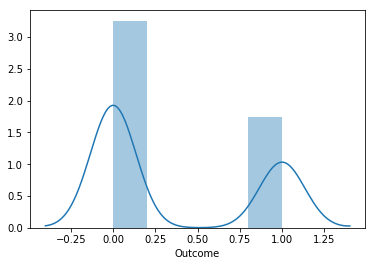

In [9]:
sb.distplot(pima.Outcome)

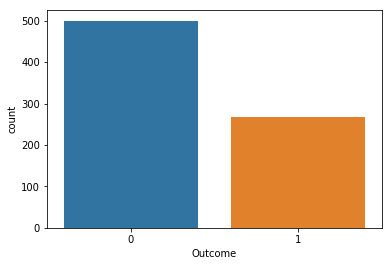

In [10]:
sb.countplot(x=pima.Outcome)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Answer:

By observing the univariate analysis done on the above histogram, I can see that the number of women who didnot have diabetes are more than the ones who were diagnosed with diabetes. This the dataset is biased towards No-Diabetes we can expect the accuracy to be skewered towards prediciting no diabetes correctly.

Also, the data set is normally distributed accross both categories of Outcome aka Class

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


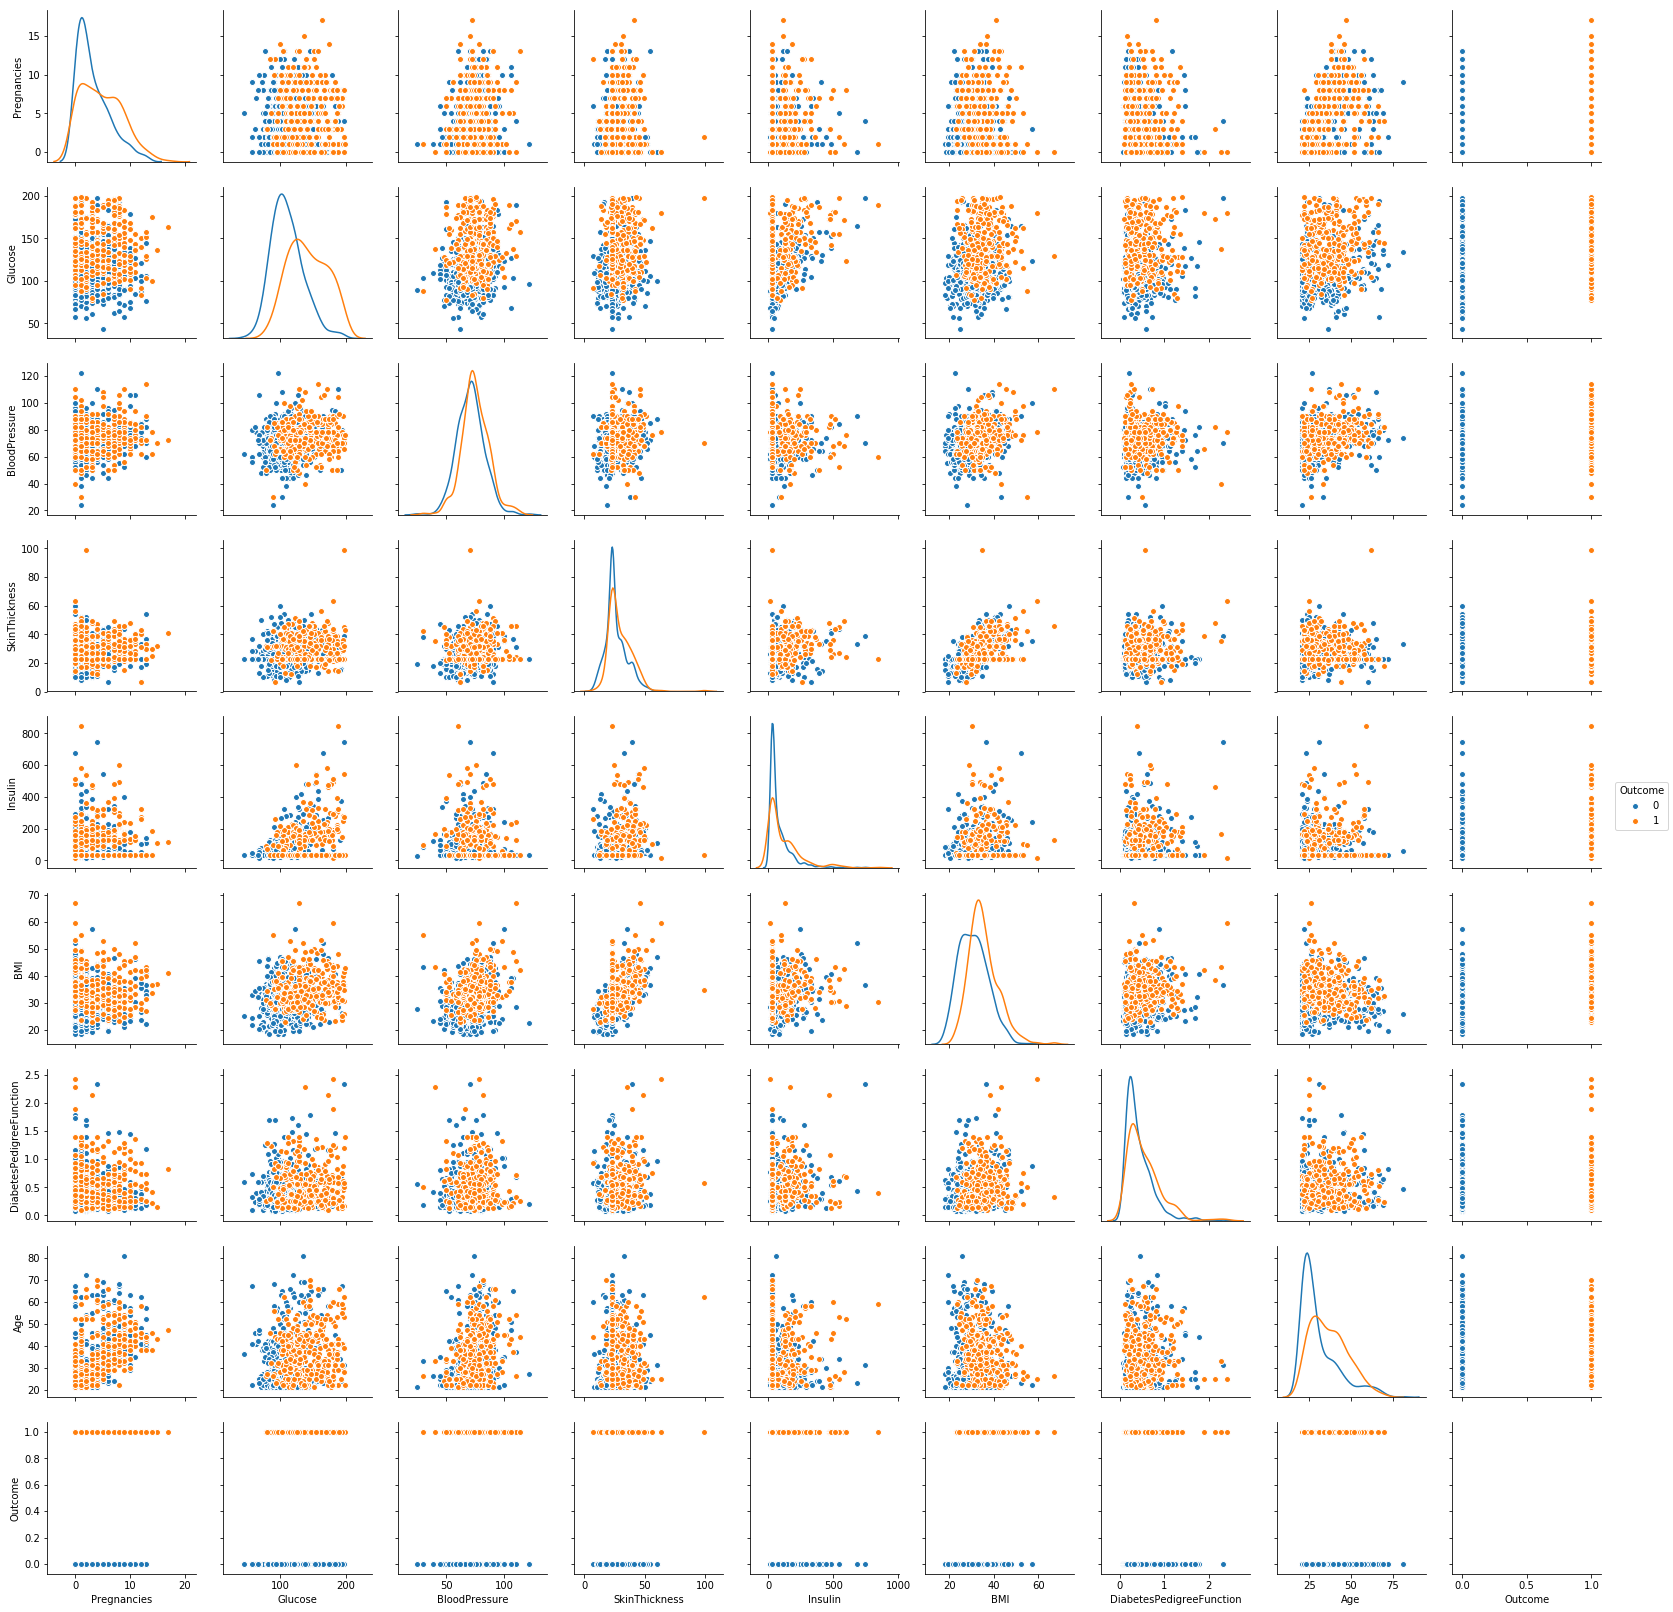

In [11]:
# The Class column is named Outcome in my data frame
sb.pairplot(data=pima,hue='Outcome',diag_kind='kde')

Observation 1:
Based on domain knowledge and research, the level of insulin in a younger person will be high,
even if the person has diabetes in the population.
But this sample shows no such relationship.

Observation 2:
The classifier on Outcomes of 0 and 1 are overlapping, making insulin a poor choice of feature for any model.
Where as in reality outcome is a complex funtion of glucose[plasma], insulin[test], BMI,Pregnancy and SkinThickness.

Observation 3:
No 2 independent columns have a relationship, linear or otherwise.

Observation 4:
Extensive research and support from SMEs will be required to choose features wisely.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test)


In [12]:
from sklearn.model_selection import train_test_split
x = pima.drop(columns=['Outcome'])
y = pima.Outcome
# Since the Random State can take any value, I have chosen 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)
print("X Train Shape:",x_train.shape)
print("X Test Shape:",x_test.shape)
print("Y Train Shape:",y_train.shape)
print("Y Test Shape:",y_test.shape)

X Train Shape: (537, 8)
X Test Shape: (231, 8)
Y Train Shape: (537,)
Y Test Shape: (231,)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [13]:
from sklearn.tree import DecisionTreeClassifier
DTC1 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
DTC1.fit(x_train,y_train)
y_predicted = DTC1.predict(x_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [14]:
print(DTC1.score(x_test,y_test))

0.7748917748917749


In [15]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predicted))

[[120  26]
 [ 26  59]]


Print the feature importance of the decision model - Optional

In [16]:
print(pd.DataFrame(DTC1.feature_importances_,columns=["Imp"],index=x_train.columns))

                               Imp
Pregnancies               0.069966
Glucose                   0.407712
BloodPressure             0.029867
SkinThickness             0.016333
Insulin                   0.015719
BMI                       0.222942
DiabetesPedigreeFunction  0.086339
Age                       0.151122


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
RFC1 = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)
RFC1.fit(x_train,y_train)
y_predicted = RFC1.predict(x_test)

In [18]:
print(RFC1.score(x_test,y_test))

0.7748917748917749


In [19]:
print(metrics.confusion_matrix(y_test, y_predicted))

[[129  17]
 [ 35  50]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ABC1 = AdaBoostClassifier(n_estimators=50,random_state=0)
ABC1.fit(x_train,y_train)
y_predicted = ABC1.predict(x_test)

In [21]:
print(ABC1.score(x_test,y_test))

0.7835497835497836


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [22]:
from sklearn.ensemble import BaggingClassifier
BC1 = BaggingClassifier(n_estimators=50,random_state=0)
BC1.fit(x_train,y_train)
y_predicted = BC1.predict(x_test)

In [23]:
print(BC1.score(x_test,y_test))

0.8008658008658008


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
GBC1 = GradientBoostingClassifier(n_estimators=50,random_state=0)
GBC1.fit(x_train,y_train)
y_predicted = GBC1.predict(x_test)

In [25]:
print(GBC1.score(x_test,y_test))

0.8008658008658008


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
VC1 = VotingClassifier(estimators=[('rf',RFC1),('dt',DTC1),('ab',ABC1),('bc',BC1),('gbc',GBC1)])
VC1.fit(x_train,y_train)
y_predicted = VC1.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
print(VC1.score(x_test,y_test))

0.8051948051948052


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
